In [55]:
! git clone https://github.com/vaibhavjha06/ds3001group

fatal: destination path 'ds3001group' already exists and is not an empty directory.


In [70]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Read in files

poverty = pd.read_csv("/content/ds3001group/arizona/azpoverty.csv")
outcomes = pd.read_excel("/content/ds3001group/arizona/arizonaoutcomes.xlsx")
outcomes2012 = outcomes[outcomes['year'] == 2012]
outcomes2016 = outcomes[outcomes['year'] == 2016]
outcomes2020 = outcomes[outcomes['year'] == 2020]

In [72]:
azdemographics2012 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2012.xlsx")
azdemographics2016 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2016.xlsx")
azdemographics2020 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2020.xlsx")
azdemographics2012 = azdemographics2012[azdemographics2012['State Name'] == "Arizona"]
azdemographics2016 = azdemographics2016[azdemographics2016['State Name'] == "Arizona"]
azdemographics2020 = azdemographics2020[azdemographics2020['State Name'] == "Arizona"]
azdemographics2012['County Name'] = azdemographics2012['County Name'].str.upper()
azdemographics2012['County Name'] = azdemographics2012['County Name'].str.replace(' COUNTY', '')
azdemographics2016['County Name'] = azdemographics2016['County Name'].str.upper()
azdemographics2016['County Name'] = azdemographics2016['County Name'].str.replace(' COUNTY', '')
azdemographics2020['County Name'] = azdemographics2020['County Name'].str.upper()
azdemographics2020['County Name'] = azdemographics2020['County Name'].str.replace(' COUNTY', '')

<ipython-input-72-82bc07d6c7f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azdemographics2012['County Name'] = azdemographics2012['County Name'].str.upper()
<ipython-input-72-82bc07d6c7f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azdemographics2012['County Name'] = azdemographics2012['County Name'].str.replace(' COUNTY', '')
<ipython-input-72-82bc07d6c7f3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [73]:
# Wrangling

poverty['Percent in Poverty'].unique()
poverty['Percent in Poverty'].value_counts()
poverty['Percent in Poverty'].isnull().sum() # No missing values


0

In [74]:
# Matching column names of files to merge
poverty['Name'] = poverty['Name'].str.replace(' County', '')
poverty['Name'] = poverty['Name'].str.upper()

In [75]:
# Merge outcomes2020 with poverty
# Problem: poverty has years beyond just 2020, need to merge only with 2020 rows

poverty2020 = poverty[poverty['Year'] == 2020]
merged_df2020 = pd.merge(poverty2020, outcomes2020, left_on='Name', right_on='county_name', how='outer')
merged_df2020 = merged_df2020.iloc[2:].reset_index(drop=True)

poverty2016 = poverty[poverty['Year'] == 2016]
merged_df2016 = pd.merge(poverty2016, outcomes2016, left_on='Name', right_on='county_name', how='outer')
merged_df2016 = merged_df2016.iloc[2:].reset_index(drop=True)

poverty2012 = poverty[poverty['Year'] == 2012]
merged_df2012 = pd.merge(poverty2012, outcomes2012, left_on='Name', right_on='county_name', how='outer')
merged_df2012 = merged_df2012.iloc[2:].reset_index(drop=True)

Mean:  18.88823529411765
Median:  17.8
Mode:  0    12.0
1    15.2
2    21.1
3    24.8
4    33.2
Name: Percent in Poverty, dtype: float64
51


<Axes: title={'center': 'Percent in Poverty'}, xlabel='party'>

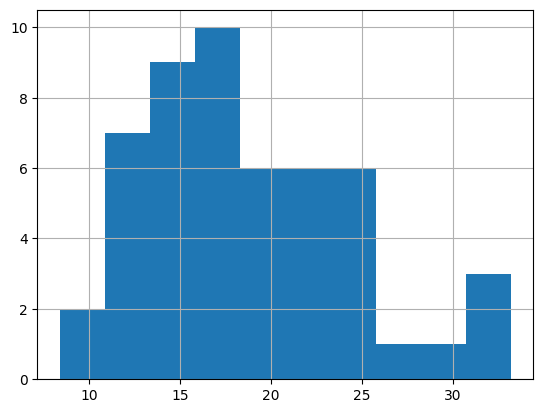

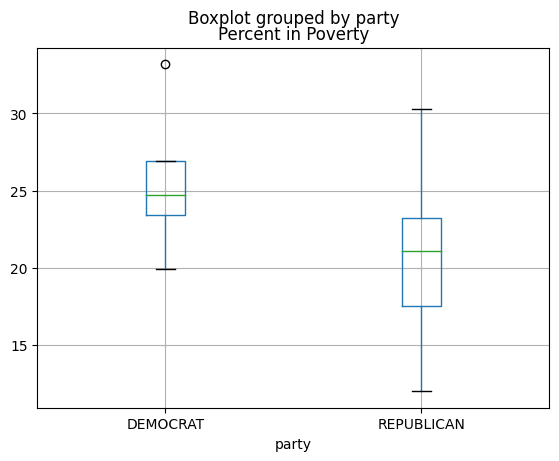

In [76]:
# EDA
poverty['Percent in Poverty'].hist() # Histogram distribution
print('Mean: ', poverty['Percent in Poverty'].mean() ) # Measures of central tendency
print('Median: ', poverty['Percent in Poverty'].median() )
print('Mode: ', poverty['Percent in Poverty'].mode() )
print(poverty.shape[0]) # 55 rows

merged_df2012.boxplot(column = 'Percent in Poverty',by = 'party')

In [77]:
az2012data = pd.merge(azdemographics2012, outcomes2012, left_on='County Name', right_on='county_name', how='outer')
outcomes2012.head(20)



,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2012,ARIZONA,AZ,APACHE,4001,US PRESIDENT,BARACK OBAMA,DEMOCRAT,17147,25848,20220315,TOTAL
1,2012,ARIZONA,AZ,COCHISE,4003,US PRESIDENT,MITT ROMNEY,REPUBLICAN,29497,49003,20220315,TOTAL
2,2012,ARIZONA,AZ,COCONINO,4005,US PRESIDENT,BARACK OBAMA,DEMOCRAT,29257,51731,20220315,TOTAL
3,2012,ARIZONA,AZ,GILA,4007,US PRESIDENT,MITT ROMNEY,REPUBLICAN,13455,21528,20220315,TOTAL
4,2012,ARIZONA,AZ,GRAHAM,4009,US PRESIDENT,MITT ROMNEY,REPUBLICAN,8076,11855,20220315,TOTAL
5,2012,ARIZONA,AZ,GREENLEE,4011,US PRESIDENT,MITT ROMNEY,REPUBLICAN,1592,2974,20220315,TOTAL
6,2012,ARIZONA,AZ,LA PAZ,4012,US PRESIDENT,MITT ROMNEY,REPUBLICAN,3714,5717,20220315,TOTAL
7,2012,ARIZONA,AZ,MARICOPA,4013,US PRESIDENT,MITT ROMNEY,REPUBLICAN,749885,1376558,20220315,TOTAL
8,2012,ARIZONA,AZ,MOHAVE,4015,US PRESIDENT,MITT ROMNEY,REPUBLICAN,49168,70010,20220315,TOTAL
9,2012,ARIZONA,AZ,NAVAJO,4017,US PRESIDENT,MITT ROMNEY,REPUBLICAN,19884,37335,20220315,TOTAL


In [78]:
outcomes_subset2012 = outcomes2012[['county_name', 'office', 'candidate', 'party', 'candidatevotes', 'totalvotes']]

merged_data2012 = pd.merge(azdemographics2012, outcomes_subset2012, left_on='County Name', right_on='county_name', how='left')

# merged_data = merged_data.drop('county_name', axis=1)

# Print or use the merged DataFrame
print(merged_data2012.head(50))


   GIS Join Match Code Data File Year State Postal Abbreviation  Region Code  \
0             G0400010      2008-2012                        AZ          NaN   
1             G0400030      2008-2012                        AZ          NaN   
2             G0400050      2008-2012                        AZ          NaN   
3             G0400070      2008-2012                        AZ          NaN   
4             G0400090      2008-2012                        AZ          NaN   
5             G0400110      2008-2012                        AZ          NaN   
6             G0400120      2008-2012                        AZ          NaN   
7             G0400130      2008-2012                        AZ          NaN   
8             G0400150      2008-2012                        AZ          NaN   
9             G0400170      2008-2012                        AZ          NaN   
10            G0400190      2008-2012                        AZ          NaN   
11            G0400210      2008-2012   

<Axes: title={'center': 'White alone Percentage'}, xlabel='party'>

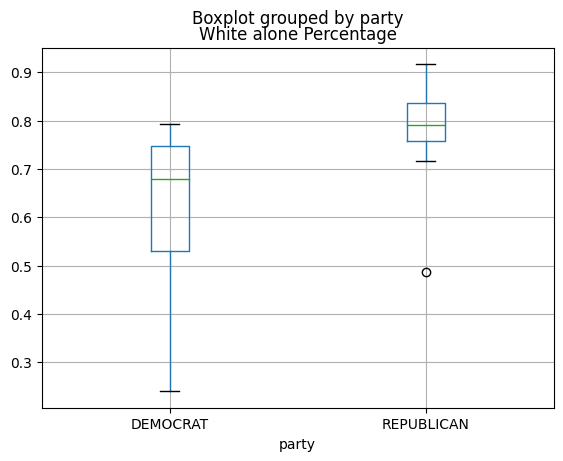

In [82]:
merged_data2012.boxplot(column = 'White alone Percentage',by = 'party')